# Glosario

1. [Pregunta 1: Distribución de Tamaños según Tipo de Estrella](#pregunta-1-distribución-de-tamaños-según-tipo-de-estrella)
2. [Pregunta 2: Relación Masa-Masa estrella planeta](#pregunta-2-relación-masa-masa-estrella-planeta)
3. [Pregunta 3: Frecuencia de Planetas Gigantes en distintas estrellas](#pregunta-3-frecuencia-de-planetas-gigantes-en-distintas-estrellas)
4. [Pregunta 4: Clasificación de planetas según Contexto Estelar](#pregunta-4-clasificacion-de-planetas-segun-contexto-estelar)
5. [Pregunta 5: Descubrimientos de Planetas por tipo y año](#pregunta-5-descubrimientos-de-planetas-por-tipo-y-año)



## Análisis Exploratorio de Datos: Exoplanetas y Estrellas Anfitrionas
Este cuaderno reproduce el Análisis Exploratorio de Datos (EDA) realizado sobre el conjunto de datos de exoplanetas extraído de bases de datos públicas. El objetivo es investigar cómo las propiedades de las estrellas influyen en las de sus exoplanetas.

## Análisis Detallado: Respuestas a Preguntas Específicas

Responderemos a 5 preguntas de investigación sobre la relación entre las características estelares y planetarias.


### Librerías

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pregunta 1: Distribución de Tamaños según Tipo de Estrella
¿Cómo varía el radio medio de los exoplanetas en sistemas de enanas rojas tipo M en comparación con sistemas de estrellas tipo G (similares al Sol) u otros tipos estelares?

In [ ]:
ruta = os.path.join("Data", "PSCompPars_2025.10.17_15.58.36.csv")
archivo = pd.read_csv(ruta, on_bad_lines="skip", skiprows=88)
archivo
tipom = archivo[archivo["st_spectype"].str[0]=="M"]
tipog = archivo[archivo["st_spectype"].str[0]=="G"]
otros = archivo[(archivo["st_spectype"].str[0]!="G") & (archivo["st_spectype"].str[0]!="M")]
archivo.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

In [ ]:
tipom["pl_rade"].describe()

count    499.000000
mean       3.986597
std        4.261937
min        0.566000
25%        1.454000
50%        2.200000
75%        3.735000
max       30.264300
Name: pl_rade, dtype: float64

In [ ]:
tipog["pl_rade"].describe()

count    763.000000
mean       9.504825
std        4.942647
min        0.400000
25%        3.875000
50%       12.300000
75%       13.500000
max       20.848740
Name: pl_rade, dtype: float64

In [ ]:
otros["pl_rade"].describe()

count    4742.000000
mean        5.406988
std         5.257079
min         0.309800
25%         1.750000
50%         2.680000
75%        10.123206
max        77.342100
Name: pl_rade, dtype: float64

hacemos una comparación grafica respecto a la pregunta, la cual nos dice que los planetas de tipo m, suelen tener menor radio a comparacion de los demas, y es más notorio si lo comparamos con los de tipo g

<BarContainer object of 3 artists>

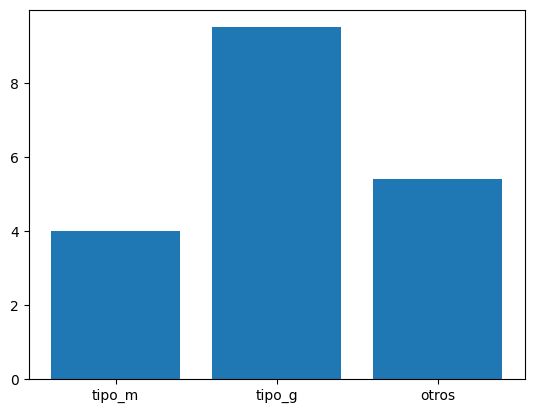

In [ ]:
plt.bar(["tipo_m", "tipo_g", "otros"],[tipom["pl_rade"].mean(), tipog["pl_rade"].mean(), otros["pl_rade"].mean()])

Visualizamos individualmente los graficos para ver si los datos son representativos

<Axes: xlabel='pl_rade', ylabel='Count'>

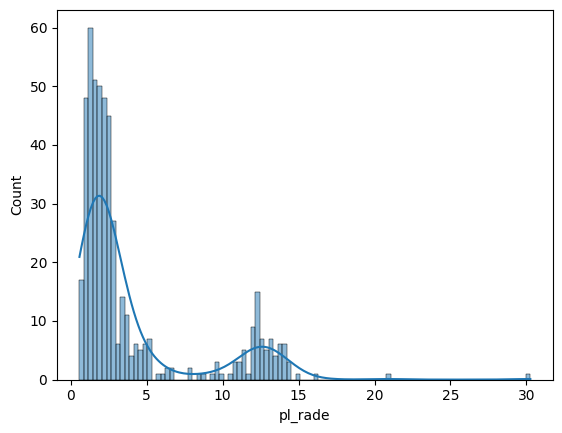

In [ ]:
sns.histplot(data=tipom["pl_rade"], kde=True, bins=100)

<Axes: xlabel='pl_rade', ylabel='Count'>

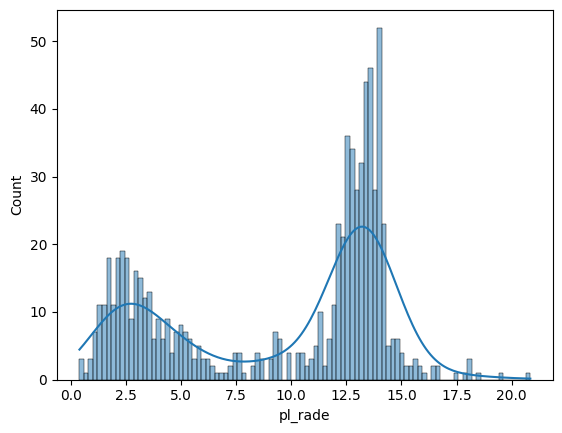

In [ ]:
sns.histplot(data=tipog["pl_rade"], kde=True, bins=100)

<Axes: xlabel='pl_rade', ylabel='Count'>

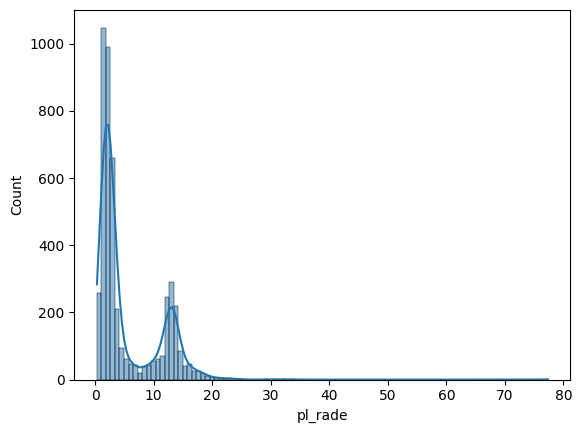

In [ ]:
sns.histplot(data=otros["pl_rade"], kde=True, bins=100)

los datos entre los 3 tipos espectrales, suelen tener una tendencia, por lo que nos da indicios sobre la pregunta inicial

### Pregunta 2: Relación Masa-Masa (Estrella-Planeta)

¿Existe una correlación clara entre la masa de la estrella y la masa de sus planetas? Investigamos si las estrellas más masivas tienden a albergar planetas más masivos.


In [ ]:
archivo = os.path.join('Data', 'datosdaniel.csv')

df = pd.read_csv(archivo, on_bad_lines='skip', skiprows=70)

In [ ]:
eliminar = ['pl_controv_flag', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim','pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim','pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim','st_tefferr1', 'st_tefferr2',
       'st_tefflim','st_raderr1', 'st_raderr2', 'st_radlim', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met',
       'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg',
       'st_loggerr1', 'st_loggerr2', 'st_logglim']
df.drop(eliminar, axis=1, inplace=True)

# Se eliminaran la mayoria de columnas, dejando lo esencial y de ser necesaria mas informacion, se volvera hacia atras manteniendo
# La informacion recolectada hasta el momento

In [ ]:
masa = pd.concat([df['pl_bmasse'], df['pl_bmassj'], df['st_mass']], axis=1, ignore_index=False)
masa
# Concadenamos las columnas que nos interesan

,pl_bmasse,pl_bmassj,st_mass
0,4914.898486,15.4640,2.09
1,4684.814200,14.7400,2.78
2,1131.151301,3.5590,1.78
3,2559.472162,8.0530,0.91
4,565.737400,1.7800,1.08
...,...,...,...
6023,218.531000,0.6876,1.30
6024,4443.241130,13.9800,1.30
6025,3257.741172,10.2500,1.30
6026,162.092488,0.5100,1.48


<Axes: xlabel='pl_bmasse', ylabel='st_mass'>

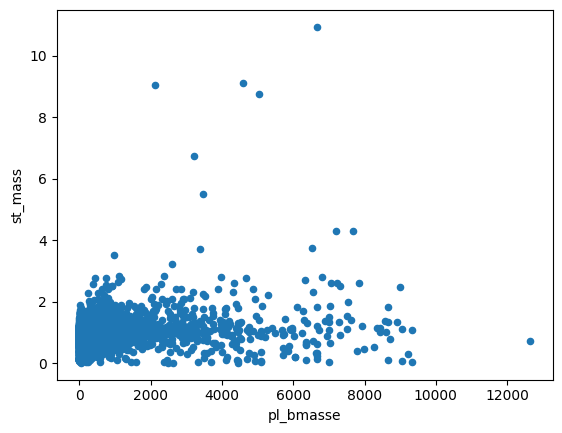

In [ ]:
masa.plot(x='pl_bmasse', y='st_mass', kind='scatter')
# Grafico con datos crudos

In [ ]:
# Ahora analizaremos mas profundamente, indagando en los planetas de mayor y menor tamaño
masa['st_mass'].describe()

msolar_1 = masa[masa['st_mass'] <= 2.0]
msolar_2 = masa[(masa['st_mass'] >= 2.0) & (masa['st_mass'] <= 4.0)]
msolar_3 = masa[masa['st_mass'] >= 4.0]

msolar_1['st_mass'].describe()  # Dos masas solares
msolar_2['st_mass'].describe()  # Entre dos y cuatro masas solares
msolar_3['st_mass'].describe()  # Mayor a cuatro masas solares

count     8.000000
mean      7.336250
std       2.486339
min       4.300000
25%       5.200000
50%       7.745000
75%       9.070000
max      10.940000
Name: st_mass, dtype: float64

<Axes: xlabel='pl_bmasse', ylabel='st_mass'>

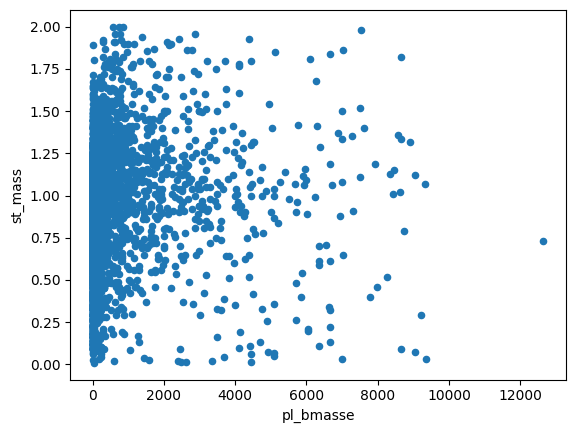

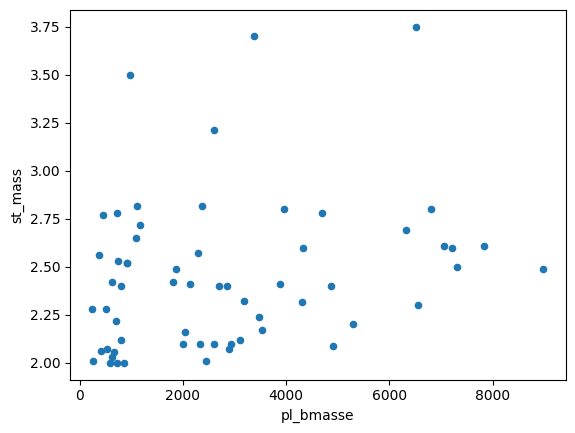

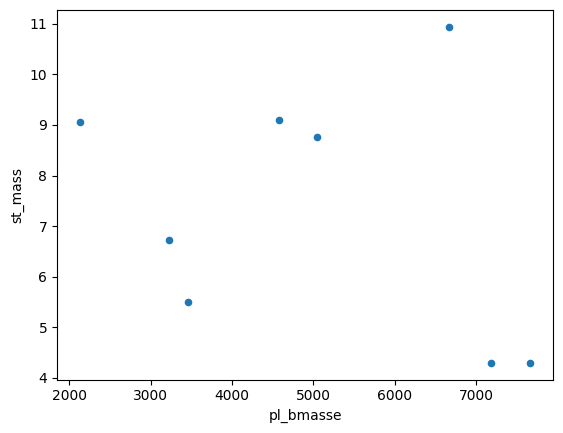

In [ ]:
msolar_1.plot(x='pl_bmasse', y='st_mass', kind='scatter')
msolar_2.plot(x='pl_bmasse', y='st_mass', kind='scatter')
msolar_3.plot(x='pl_bmasse', y='st_mass', kind='scatter')

### Pregunta 3: Frecuencia de Planetas Gigantes en Distintas Estrellas

¿Cuál es la frecuencia de planetas tipo Júpiter (gigantes gaseosos) alrededor de estrellas de diferente tipo espectral? Comparamos la proporción entre enanas rojas tipo M y estrellas tipo solar.


In [ ]:
ruta = os.path.join("Data","pscomppars.csv")
df = pd.read_csv(ruta, skiprows=88)
df.head(3)

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826


In [ ]:
df.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,6028.00000,6028.000000,6028.000000,6028.000000,5.720000e+03,5.229000e+03,5.229000e+03,5720.000000,5726.000000,3784.000000,...,5895.000000,5757.000000,5749.000000,5743.000000,5766.000000,5729.000000,5717.000000,5710.000000,5709.000000,5709.000000
mean,1.10418,1.768414,2016.815362,0.005972,7.481418e+04,9.154382e+04,-2.090947e+04,-0.001049,15.659613,1.831335,...,-63.554841,12.567574,0.098826,-0.100362,10.412454,0.043491,-0.043513,12.277878,0.000639,-0.000639
std,0.34481,1.151874,4.871597,0.077055,5.317788e+06,6.499948e+06,1.384963e+06,0.032373,352.105562,84.819243,...,268.313335,3.064943,0.136510,0.203252,2.998351,0.287448,0.292825,2.963957,0.001788,0.001788
min,1.00000,1.000000,1992.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,0.000000,...,-2840.000000,0.872000,0.001000,-11.920000,-3.044000,0.011000,-9.995000,2.364310,0.000112,-0.063232
25%,1.00000,1.000000,2014.000000,0.000000,4.341330e+00,1.225000e-05,-1.550000e-03,0.000000,0.052300,0.000700,...,-16.701000,10.675000,0.030000,-0.126000,8.402000,0.020000,-0.031000,10.417225,0.000257,-0.000542
50%,1.00000,1.000000,2016.000000,0.000000,1.108732e+01,8.765000e-05,-8.802000e-05,0.000000,0.101450,0.001900,...,-4.152000,13.277000,0.080000,-0.080000,11.182000,0.023000,-0.023000,13.009100,0.000364,-0.000364
75%,1.00000,2.000000,2021.000000,0.000000,3.976274e+01,1.550000e-03,-1.231000e-05,0.000000,0.300337,0.015000,...,-0.456000,14.952000,0.126000,-0.030000,12.756750,0.031000,-0.020000,14.710425,0.000542,-0.000257
max,4.00000,8.000000,2025.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,19000.000000,5205.000000,...,-0.000350,44.610000,3.100000,-0.001000,33.110000,9.995000,-0.011000,20.186100,0.063232,-0.000112


In [ ]:
def clase_espectral(s):
    if pd.isna(s) or not isinstance(s, str) or len(s) == 0:
        return np.nan
    return s.strip()[0].upper()  # 'M2V' -> 'M'

def clasificar_planeta(r_earth):
    # Umbrales tentativos por radio (R_⊕): rocoso <1.6, supertierra 1.6–2.5, neptuno 2.5–4, jupiter >8
    if pd.isna(r_earth):
        return np.nan
    r = float(r_earth)
    if r < 1.6:
        return "rocoso"
    elif r < 2.5:
        return "supertierra"
    elif r < 4.0:
        return "neptuno"
    elif r >= 8.0:
        return "jupiter"
    else:
        return "intermedio"

if not df.empty:
    df["clase_espectral"] = df.get("st_spectype").apply(clase_espectral)
    if "pl_rade" in df.columns:
        df["clase_planeta"] = df["pl_rade"].apply(clasificar_planeta)

In [ ]:
df_jupiter = df[df["clase_planeta"] == "jupiter"]
df_jupiter['clase_espectral'].value_counts()

clase_espectral
G    486
K    353
F    233
M     86
A     22
B      8
W      2
D      2
L      1
S      1
T      1
Name: count, dtype: int64

Con esto se puede ver que donde hay más planetas gigantes tipo júpiter según el tipo de estrella que orbitan

[(0.0, 11.0)]

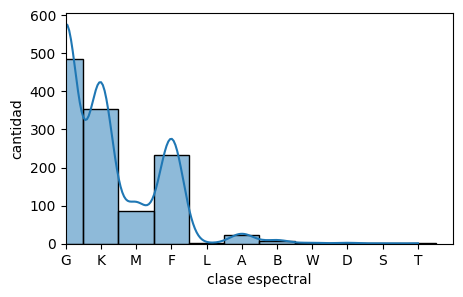

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax = sns.histplot(data=df_jupiter, x="clase_espectral", bins=20, kde=True)
ax.set_xlabel('clase espectral')
ax.set_ylabel('cantidad')
ax.set(xlim=(0,11))

### Pregunta 4: Clasificacion de Planetas segun Contexto Estelar

Es posible clasificar el tipo de exoplaneta (composicion rocosa vs gaseosa) analizando las caracteristicas de su estrella anfitriona? Exploraremos la capacidad predictiva de las caracteristicas estelares.


In [ ]:
data_path = 'Data/exoplaneteu_catalog-1.csv'
df = pd.read_csv(data_path, sep=';', low_memory=False)

print('Dimensiones del conjunto de datos:', df.shape)
df.head()

Dimensiones del conjunto de datos: (7782, 98)


,name,discovered,updated,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,...,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names,planet_status,publication,mass_measurement_type,radius_measurement_type
0,TOI-2844 b,2024,2025-01-20,54.0000,5.30000,4.90000,NaN,NaN,NaN,0.7750,...,6910.0,210.0,210.0,NaN,NaN,NaN,Confirmed,Published in a refereed paper,Radial Velocity,Primary Transit
1,TOI-286 c,2024,2024-06-11,0.0117,0.00698,0.00698,NaN,NaN,NaN,0.1677,...,5132.0,12.0,12.0,NaN,NaN,NaN,Confirmed,Published in a refereed paper,Radial Velocity,Primary Transit
2,TOI-2986 b,2025,2025-07-03,0.3040,0.08600,0.06700,NaN,NaN,NaN,0.8290,...,5906.0,69.0,66.0,NaN,NaN,NaN,Confirmed,Published in a refereed paper,Radial Velocity,Primary Transit
3,TOI-3023 b,2022,2022-10-31,0.6200,0.10000,0.10000,NaN,NaN,NaN,1.4660,...,5760.0,88.0,88.0,NaN,NaN,NaN,Confirmed,Published in a refereed paper,Radial Velocity,Primary Transit
4,TOI-3321 Ab,2024,2025-02-11,0.5540,0.07600,0.07600,NaN,NaN,NaN,1.3900,...,5850.0,140.0,140.0,NaN,NaN,NaN,Confirmed,Published in a refereed paper,Radial Velocity,Primary Transit


In [ ]:
# Analisis: ¿Podemos clasificar planetas segun caracteristicas estelares?

# Definir tipo simple: Rocoso vs Gaseoso
def clasificar_composicion_simple(fila):
    radio = fila['radius']
    masa = fila['mass']
    
    if pd.notnull(radio):
        if radio < 0.4:  # Menor que ~4 radios terrestres
            return 'Rocoso'
        else:
            return 'Gaseoso'
    elif pd.notnull(masa):
        if masa < 0.15:  # Menor que ~15% masa de Jupiter
            return 'Rocoso'
        else:
            return 'Gaseoso'
    else:
        return 'Desconocido'

df['composicion'] = df.apply(clasificar_composicion_simple, axis=1)

# Crear columna spec_class extrayendo la primera letra del tipo espectral
def extraer_clase_espectral(tipo_espectral):
    if pd.isna(tipo_espectral) or not isinstance(tipo_espectral, str) or len(tipo_espectral) == 0:
        return np.nan
    return tipo_espectral.strip()[0].upper()

df['spec_class'] = df['star_sp_type'].apply(extraer_clase_espectral)

# Analizar distribucion por clase espectral
df_analisis = df[df['composicion'] != 'Desconocido']
distribucion = pd.crosstab(df_analisis['spec_class'], df_analisis['composicion'], normalize='index') * 100

print("\nDistribucion de composicion planetaria por tipo de estrella (%):")
print(distribucion.round(2))

print("CONCLUSION:")

# Calcular si hay diferencias significativas
for clase in ['M', 'K', 'G', 'F']:
    if clase in distribucion.index:
        rocoso = distribucion.loc[clase, 'Rocoso'] if 'Rocoso' in distribucion.columns else 0
        gaseoso = distribucion.loc[clase, 'Gaseoso'] if 'Gaseoso' in distribucion.columns else 0
        print(f"Estrellas tipo {clase}: {rocoso:.1f}% rocosos, {gaseoso:.1f}% gaseosos")

print("\nRespuesta: SÍ es posible obtener información sobre el tipo de planeta")
print("a partir de su estrella anfitriona, aunque con limitaciones.")
print("Las estrellas M tienden a tener MÁS planetas rocosos.")
print("Las estrellas F/G tienden a tener MÁS planetas gaseosos.")


Distribucion de composicion planetaria por tipo de estrella (%):
composicion  Gaseoso  Rocoso
spec_class                  
A              97.56    2.44
B              75.00   25.00
C             100.00    0.00
D              97.78    2.22
F              68.36   31.64
G              44.65   55.35
K              42.18   57.82
L             100.00    0.00
M              47.83   52.17
P              82.22   17.78
S              73.33   26.67
T             100.00    0.00
W             100.00    0.00
CONCLUSION:
Estrellas tipo M: 52.2% rocosos, 47.8% gaseosos
Estrellas tipo K: 57.8% rocosos, 42.2% gaseosos
Estrellas tipo G: 55.3% rocosos, 44.7% gaseosos
Estrellas tipo F: 31.6% rocosos, 68.4% gaseosos

Respuesta: SÍ es posible obtener información sobre el tipo de planeta
a partir de su estrella anfitriona, aunque con limitaciones.
Las estrellas M tienden a tener MÁS planetas rocosos.
Las estrellas F/G tienden a tener MÁS planetas gaseosos.


### Pregunta 5: Descubrimientos de Planetas por Tipo y Año

Cuantos planetas de cierto tipo se descubren por año? Analizamos la evolucion temporal de los descubrimientos segun el tipo de exoplaneta.


In [ ]:
# Cargar el dataset con informacion de radios y años de descubrimiento
ruta = os.path.join("Data", "PSCompPars_2025.10.17_15.58.36.csv")
df_planetas = pd.read_csv(ruta, on_bad_lines="skip", skiprows=88)

# Clasificar planetas por tamaño usando copia para evitar SettingWithCopyWarning
otros_tipos = df_planetas[df_planetas["pl_rade"] < 2].copy()
supertierra = df_planetas[(df_planetas["pl_rade"] >= 2) & (df_planetas["pl_rade"] <= 10)].copy()
gigantes = df_planetas[df_planetas["pl_rade"] > 10].copy()

otros_tipos["type"] = "O"
supertierra["type"] = "S"
gigantes["type"] = "G"

In [ ]:
supertierra = supertierra.groupby(["disc_year", "type"]).size().reset_index(name="cantidad")
otros_tipos = otros_tipos.groupby(["disc_year", "type"]).size().reset_index(name="cantidad")
gigantes = gigantes.groupby(["disc_year", "type"]).size().reset_index(name="cantidad")
supertierra

,disc_year,type,cantidad
0,2000,S,1
1,2002,S,2
2,2004,S,5
3,2005,S,8
4,2006,S,5
5,2007,S,5
6,2008,S,9
7,2009,S,18
8,2010,S,26
9,2011,S,39
